## Richardson's Model
Let $x$ and $y$ be the arms expenditure of two nations. The one differential equation that dyscribes the dynamics of the system is
$$
\begin{aligned}
&d x / d t=a y-m x+r \\
&d y / d t=b x-n y+s
\end{aligned}
$$
- $a$ and $b$ are the reactions of the nations to the arm levels of the other nation (ex. for every unit of currency nation $y$ spends on its arms supply, then nation $x$ increases its arms spending by $a$)
- $m$ and $n$ represent the reluctance of nations $x$ and $y$ to spend more of their budget on arms.
- The constants $r$ and $s$ are the hostility/peace terms. (ex. $r<0$ means that if nation $y$ will not increase its arsenal then $x$ will not be inclined to increase it)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from population_dynamics import ExplicitEuler, Integrator, RK2
from scipy.integrate import solve_ivp
from scipy import integrate

In [34]:
class ArmsRace:
    """This class defines the Richardson's Model

    Attributes:
        a    nation x’s reaction coefficient 
        b    nation y’s reaction coefficient 
        m    nation x’s fatigue coefficient 
        n    nation y’s fatigue coefficient 
        r    nation x’s hostility/peace value
        s    nation y’s hostility/peace value
    """
    def __init__(self,a,b,m,n,r,s):
        self.a = a
        self.b = b
        self.m = m
        self.n = n
        self.r = r
        self.s = s

    def __call__(self,S,t=0):
        if len(S.shape) == 1:
            dS = np.zeros(len(S))
        else:
            dS = [0.0,0.0]
        dS[0] = self.a * S[1] - self.m * S[0] + self.r
        dS[1] = self.b * S[0] - self.n * S[1] + self.s

        return dS

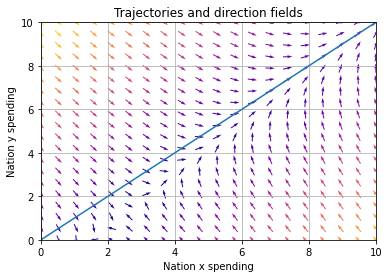

In [42]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X , Y = np.meshgrid(x,y)
DX, DY = ArmsRace(1.0,1.2,0.9,0.8,1.0,-2.0)(np.array([X,Y]))
M = (np.hypot(DX, DY))
M[ M == 0] = 1.
DX /= M #Rescale to unit arrows
DY /= M
 
plt.title('Trajectories and direction fields')
Q = plt.quiver(X, Y, DX, DY, M, pivot='mid', cmap=plt.cm.plasma)
plt.plot(x,y)
plt.xlabel('Nation x spending')
plt.ylabel('Nation y spending')
plt.grid()
plt.xlim(0, x.max())
plt.ylim(0, y.max())
plt.show()

Notes:
   - If nation y spending is a more than x nation then it is going to decrease only until a point
   - The same holds for nation x but it is going to wait a bit more because it's fatigue is slightly bigger (0.9)
   - If the initial spending of both countries is small then the countris will not race

## Compare solutions with scipy package

In [52]:
def plot_dynamics(t, dynamics, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
    ax1.plot(t,dynamics[:,0], label = 'x')
    ax1.plot(t,dynamics[:,1],label = 'y')
    ax1.set_title(title)
    ax1.set_ylabel('y-x spending')
    ax1.set_xlabel('t')
    ax1.legend()
    ax1.set_ylim(0, dynamics[:,1].max())
    
    ax2.plot(dynamics[:,0], dynamics[:,1])
    ax2.set_title("phase plane")
    ax2.set_ylabel("y")
    ax2.set_xlabel('x')
    plt.show()

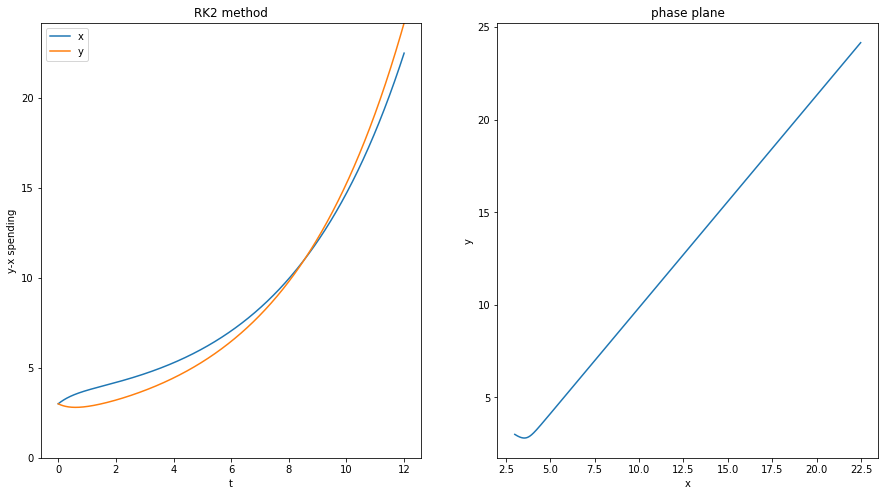

In [53]:
s0 = np.array([3, 3])
tmin = 0
tmax = 12
solver_c = Integrator(RK2(model_race),s0,tmin,tmax,2000)
dynamics = solver_c.integrate()
t = solver_c.getIntegrationTime()
dynamics_scipy = integrate.odeint(model_race, s0, t)

plot_dynamics(t,dynamics, 'RK2 method')

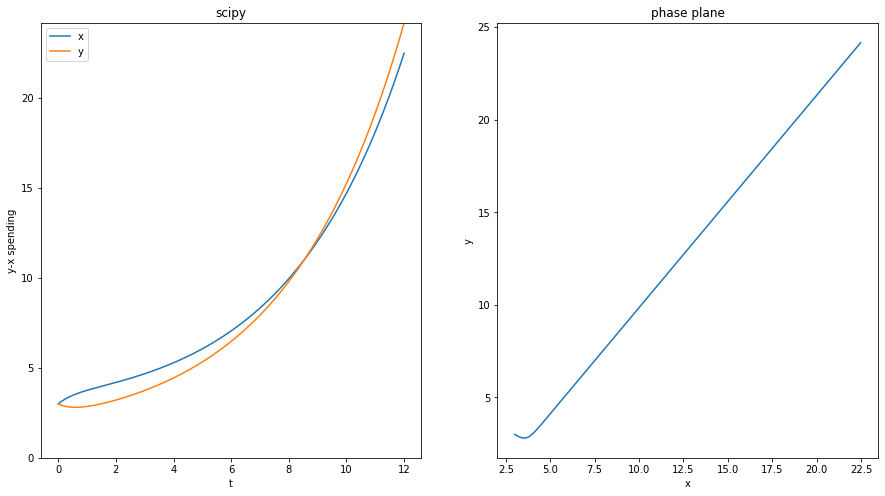

In [54]:
plot_dynamics(t,dynamics_scipy, 'scipy')

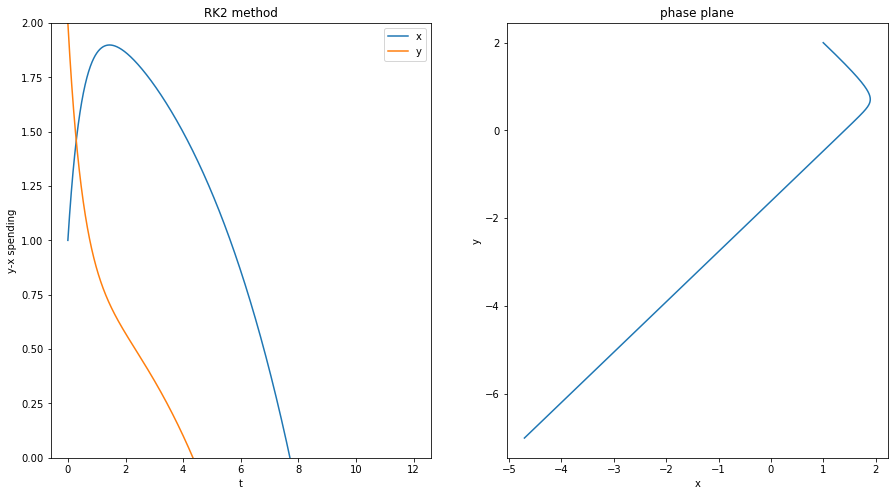

In [55]:
s0 = np.array([1, 2])
solver_c = Integrator(RK2(model_race),s0,tmin,tmax,2000)
dynamics = solver_c.integrate()
t = solver_c.getIntegrationTime()
dynamics_scipy = integrate.odeint(model_race, s0, t)

plot_dynamics(t,dynamics, 'RK2 method')

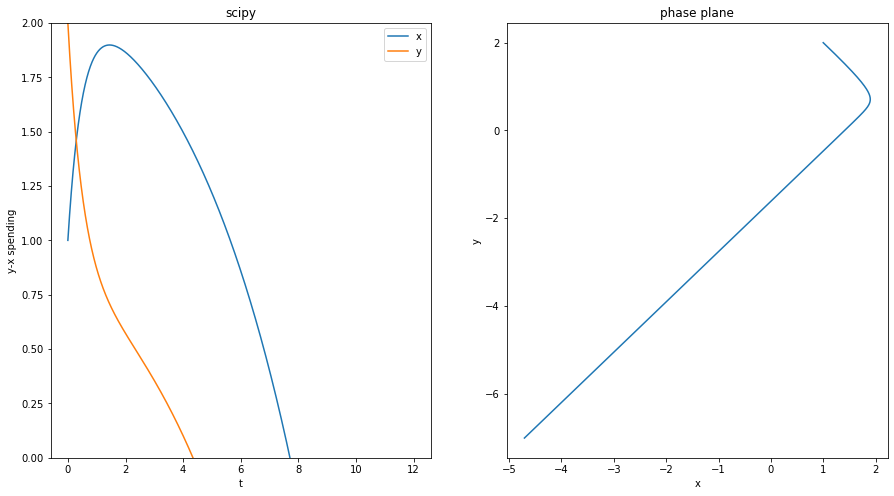

In [56]:
plot_dynamics(t,dynamics_scipy, 'scipy')